In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
import pickle

In [3]:
files = glob.glob('/Users/jane/Desktop/data-to-use/*.csv')

In [4]:
def get_cat_name(string):
    if string:
        if type(string) != float:
            content = ast.literal_eval(string)
            if type(content) == list:
                if len(content) != 0:
                    cat_name = content[0]
                    if type(content[0]) == list:
                        cat_name = content[0][0].split('/')[1] 
                    return cat_name

In [48]:
#Putting all the files into a df, and cleaning up the category names
for f in files:
    df = pd.read_csv(f)
df.dropna(subset=['categories'], inplace=True)
indexNames = df[df['categories'] == '[]'].index
df.drop(indexNames, inplace=True)
categories = df['categories'].to_list()
temp_lst = []
for e in categories:
    temp_lst.append(get_cat_name(e))    
df['categories'] = temp_lst

#Splitting up December through March 
dec = df[(df['months']  == 12) & (df['years']==2019)]
jan = df[(df['months']  == 1) & (df['years']==2020)] 
feb = df[(df['months']  == 2) & (df['years']==2020)]
mar = df[(df['months']  == 3) & (df['years']==2020)]


#Grouping by hour, category 
dec_grouped = dec.groupby(['hours', 'categories']).count().reset_index()
renamed_dec = dec_grouped.rename(columns={'Unnamed: 0':'total'})
dec_final = renamed_dec[['hours', 'categories', 'total']]
dec


# jan_grouped = jan.groupby(['hours', 'categories']).count().reset_index()
# renamed_jan = jan_grouped.rename(columns={'Unnamed: 0':'total'})
# jan_final = renamed_jan[['hours', 'categories', 'total']]
# jan_final.head()

# feb_grouped = feb.groupby(['hours', 'categories']).count().reset_index()
# renamed_jan = feb_grouped.rename(columns={'Unnamed: 0':'total'})
# feb_final = renamed_feb[['hours', 'categories', 'total']]


# mar_grouped = mar.groupby(['hours', 'categories']).count().reset_index()
# renamed_mar = mar_grouped.rename(columns={'Unnamed: 0':'total'})
# mar_final = renamed_mar[['hours', 'categories', 'total']]
# print(feb_final)

,Unnamed: 0,Unnamed: 0.1,ratings,action,categories,dislikes,likes,durations,view_cnts,years,months,days,hours,minutes,weekdays,link,titles,source,query,datetime
4569,2437,2437,4.922280,Watched,People & Blogs,30.0,1514.0,2578.0,47815.0,2019,12,1,12,49,6,https://www.youtube.com/watch?v=y1MpI6_XSxg,HOW MAHIMA KUKREJA THREATENED UTSAV CHAKRABORT...,youtube,NaN,2019-12-01 12:49:00
4570,2436,2436,4.864456,Watched,Education,417.0,11889.0,576.0,504770.0,2019,12,1,12,51,6,https://www.youtube.com/watch?v=NFhShjmHq7s,All India Bakchod (AIB) Utsav Chakraborty #MeT...,youtube,NaN,2019-12-01 12:51:00
4571,2435,2435,4.074597,Watched,Entertainment,459.0,1525.0,225.0,1199393.0,2019,12,1,14,14,6,https://www.youtube.com/watch?v=zVqB1M1DXJM,Alex Angel - Hot Kissing On Pool Table,youtube,NaN,2019-12-01 14:14:00
4572,2433,2433,4.805476,Watched,People & Blogs,595.0,11640.0,972.0,1278447.0,2019,12,1,14,20,6,https://www.youtube.com/watch?v=98SiLOWel-w,"Makeout, Phone Number & Dealing With Aggressiv...",youtube,NaN,2019-12-01 14:20:00
4573,2434,2434,4.697027,Watched,Entertainment,242.0,2953.0,248.0,923931.0,2019,12,1,14,20,6,https://www.youtube.com/watch?v=h6xMQj8NuPg,Jordan Is Making the Most Out of Being Single ...,youtube,NaN,2019-12-01 14:20:00
4574,2432,2432,4.774784,Watched,People & Blogs,5750.0,96374.0,264.0,12832159.0,2019,12,1,16,12,6,https://www.youtube.com/watch?v=0fR_ADSIr4Y,Kashni (Shape Of You Remix) - Ed Sheeran ft Ja...,youtube,NaN,2019-12-01 16:12:00
4575,2431,2431,4.824735,Watched,Sports,1567.0,34196.0,389.0,3301833.0,2019,12,1,16,16,6,https://www.youtube.com/watch?v=35dcYy1UrmM,Aussies close in on clean sweep after Yasir ce...,youtube,NaN,2019-12-01 16:16:00
4576,2430,2430,4.860546,Watched,Entertainment,120.0,3322.0,322.0,400950.0,2019,12,1,17,19,6,https://www.youtube.com/watch?v=W75f-p1Of6g,Stereonation - Larl Larl Boleeyan (I've Been W...,youtube,NaN,2019-12-01 17:19:00
4577,2429,2429,4.544417,Watched,Music,3613.0,28109.0,319.0,12234330.0,2019,12,1,17,23,6,https://www.youtube.com/watch?v=xBqZRWTYuyA,Kaho Naa Pyaar Hai - Jaaneman Jaaneman (720p F...,youtube,NaN,2019-12-01 17:23:00
4578,2428,2428,4.778665,Watched,Music,2316.0,39539.0,213.0,7178972.0,2019,12,1,17,26,6,https://www.youtube.com/watch?v=CGn0Ww_WvME,Dhoom Dhoom - Full Song | Dhoom | Tata Young |...,youtube,NaN,2019-12-01 17:26:00


In [60]:
d= {}
dec_hour = dec.groupby(['hours', 'categories'])
for name, group_df in dec_hour:
    hr, cat = name
    count = len(group_df)
    if cat not in d:
        hr_vec = [0 for i in range(24)]
        hr_vec[hr] += count
        d[cat] = hr_vec
    else:
        d[cat][hr] += count
        
j= {}
jan_hour = jan.groupby(['hours', 'categories'])
for name, group_df in jan_hour:
    hr, cat = name
    count = len(group_df)
    if cat not in j:
        hr_vec = [0 for i in range(24)]
        hr_vec[hr] += count
        j[cat] = hr_vec
    else:
        j[cat][hr] += count
f = {}       
feb_hour = feb.groupby(['hours', 'categories'])
for name, group_df in feb_hour:
    hr, cat = name
    count = len(group_df)
    if cat not in f:
        hr_vec = [0 for i in range(24)]
        hr_vec[hr] += count
        f[cat] = hr_vec
    else:
        f[cat][hr] += count
        
m = {}       
mar_hour = mar.groupby(['hours', 'categories'])
for name, group_df in mar_hour:
    hr, cat = name
    count = len(group_df)
    if cat not in m:
        hr_vec = [0 for i in range(24)]
        hr_vec[hr] += count
        m[cat] = hr_vec
    else:
        m[cat][hr] += count

        


{'Adult': [1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Arts & Entertainment': [1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  2,
  2,
  0,
  0,
  0,
  0,
  0,
  1,
  1],
 'Beauty & Fitness': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  2,
  0,
  0,
  0,
  0],
 'Books & Literature': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Business & Industrial': [1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Comedy': [0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  1,
  2,
  5,
  9,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Education': [0,
  1,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'Entertainment': [2,
  6,
  0

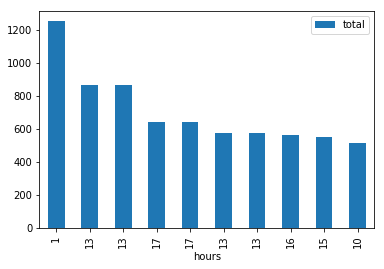

In [45]:
feb_news = feb_final[feb_final['categories']=="News & Politics"]
plot1 = feb_news.plot.bar(x='hours', y='total')

In [8]:
print(before_dropped)

     months            categories  total
0         1                Comedy     10
1         1             Education      4
2         1         Entertainment     90
3         1      Film & Animation     11
4         1                Gaming      1
5         1         Howto & Style      9
6         1                 Music    294
7         1       News & Politics     14
8         1        People & Blogs     71
9         1                Sports     19
10        1       Travel & Events      7
11        1  Arts & Entertainment      1
12        1  Arts & Entertainment      1
13        1  Arts & Entertainment      3
14        1  Arts & Entertainment      1
15        1  Arts & Entertainment      4
16        1  Arts & Entertainment      1
17        1  Arts & Entertainment      3
18        1  Arts & Entertainment      1
19        1  Arts & Entertainment      6
20        1  Arts & Entertainment      4
21        1  Arts & Entertainment      1
22        1  Arts & Entertainment      2
23        1  Art

In [9]:
total_categories = dropped.groupby(['months', 'categories']).sum().reset_index()
before_total_categories = before_dropped.groupby(['months', 'categories']).sum().reset_index()
finished_df = total_categories.rename(columns={'total':'amount'})
before_finished_df = before_total_categories.rename(columns={'total':'amount'})

In [10]:
before_finished_df.head()

,months,categories,amount
0,1,Arts & Entertainment,66
1,1,Beauty & Fitness,1
2,1,Books & Literature,2
3,1,Business & Industrial,33
4,1,Comedy,10


In [11]:
arts = finished_df[finished_df['categories'] == 'Arts & Entertainment']
before_arts = before_finished_df[before_finished_df['categories'] == 'Arts & Entertainment']

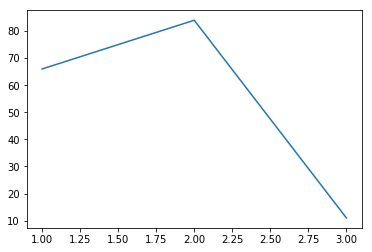

In [12]:
plot1 = plt.plot(before_arts['months'], before_arts['amount'])

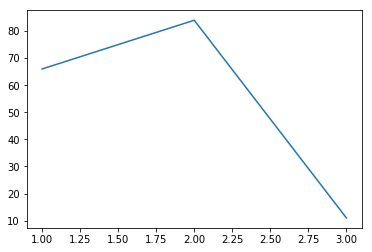

In [13]:
plot2 = plt.plot(before_arts['months'], before_arts['amount'])
